**Name :** Vignesh Ram

**Date:** 21-Mar-2022

**Problem Statement:** Categorize User Reviews

**Model used:** Latent Dirichlet Allocation (LDA)

In [1]:
pip install pyLDAvis

**Importing necessary Libraries**

In [2]:
import pandas as pd
import re
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim.corpora as corpora
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim_models
import pickle
import os

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


**Mounting Google Drive on runtime**

**Note:** When input file is placed in local drive, the path needs to be changed accordingly.

In [3]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Reading data**

In [4]:
df = pd.read_csv(path + 'User_Reviews.csv')

**Data Processing**:
*   Removing punctuation
*   Lower casing



In [5]:
# Remove punctuation
df['Text_processed'] = df['Text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df['Text_processed'] = df['Text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
df['Text_processed'].head()

<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<ipython-input-5-6efd6e04b4fd>:2: DeprecationWarning: invalid escape sequence \.
  df['Text_processed'] = df['Text'].map(lambda x: re.sub('[,\.!?]', '', x))


0    i absolutly love this modle it is soooooooo co...
1    i love this parfum spray i was very pleased at...
2    we love this collar it's sturdy convenient and...
3    the game that made me the most competitive foo...
4    got this for my boyfriend after smelling it in...
Name: Text_processed, dtype: object

**EDA and Visualization**

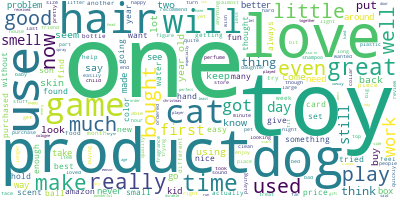

In [6]:
# Joining the different processed titles together.
long_string = ','.join(list(df['Text_processed'].values))
# Creating a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generating a word cloud
wordcloud.generate(long_string)
# Visualizing the word cloud
wordcloud.to_image()

**Tokenizing the text and removing stopwords**

In [7]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = df.Text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['absolutly', 'love', 'modle', 'soooooooo', 'cool', 'big', 'smarty', 'jones', 'fan', 'must', 'really', 'made', 'playing', 'like', 'display', 'shelf', 'half', 'special', 'section']


**Converting the tokenized object into a corpus and dictionary**

In [8]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)]


**LDA model training**

In [9]:
# number of topics
num_topics = 5
# Building LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

**Printing the Keywords in the 5 topics**

In [10]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.009*"game" + 0.008*"great" + 0.008*"one" + 0.007*"like" + 0.007*"product" '
  '+ 0.007*"time" + 0.006*"really" + 0.006*"would" + 0.005*"good" + '
  '0.005*"old"'),
 (1,
  '0.010*"hair" + 0.010*"product" + 0.008*"like" + 0.008*"one" + 0.007*"love" '
  '+ 0.007*"would" + 0.006*"get" + 0.006*"really" + 0.006*"toy" + '
  '0.005*"well"'),
 (2,
  '0.009*"one" + 0.009*"product" + 0.009*"hair" + 0.006*"time" + 0.006*"would" '
  '+ 0.006*"get" + 0.005*"great" + 0.005*"game" + 0.005*"loves" + '
  '0.005*"used"'),
 (3,
  '0.012*"one" + 0.010*"like" + 0.009*"dog" + 0.008*"would" + 0.007*"good" + '
  '0.006*"great" + 0.006*"cat" + 0.006*"product" + 0.006*"even" + 0.006*"toy"'),
 (4,
  '0.009*"great" + 0.007*"hair" + 0.007*"get" + 0.007*"one" + 0.007*"game" + '
  '0.006*"time" + 0.005*"little" + 0.005*"old" + 0.005*"toy" + 0.005*"like"')]


**Visualizing the topics:**

The below visualization interactively helps in following ways:

*   Each topic can be selected manually to view its top most frequent and/or “relevant” terms using different values of the λ parameter. This can help when trying to assign a human interpretable name or “meaning” to each topic.
*   The Intertopic Distance Plot can help learning about how topics relate to each other, including potential higher-level structure between groups of topics.

The visualization output is stored as html.

In [11]:
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join(path +'LDAvis_prepared_'+str(num_topics))

LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)    
pyLDAvis.save_html(LDAvis_prepared, path + 'Topics_' + str(num_topics) +'.html')
LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.004811  0.017638       1        1  25.412763
3     -0.018246  0.018546       2        1  24.960202
0      0.037470  0.004104       3        1  20.084178
4     -0.001464 -0.038356       4        1  15.723556
2     -0.022571 -0.001932       5        1  13.819301, topic_info=      Term        Freq       Total Category  logprob  loglift
167   hair  857.000000  857.000000  Default  30.0000  30.0000
57    game  643.000000  643.000000  Default  29.0000  29.0000
73   great  791.000000  791.000000  Default  28.0000  28.0000
41    time  612.000000  612.000000  Default  27.0000  27.0000
205    dog  584.000000  584.000000  Default  26.0000  26.0000
..     ...         ...         ...      ...      ...      ...
408    toy   67.413799  663.160431   Topic5  -5.5790  -0.3071
477   also   55.442580  449.332133   Topic5  -5.7745  -0.1133
7     like   65.197789  956.965007   Topic5  -5.6124  -0.7072
294  first   52.835993  429.522864   Topic5  -5.8227  -0.1164
252   even   49.080346  526.325794   Topic5  -5.8964  -0.3934

[462 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
5314       4  0.718693    accurately
3700       1  0.773261     addicting
14208      2  0.867795  administered
8988       1  0.100848         aging
8988       2  0.302544         aging
...      ...       ...           ...
3001       2  0.197381           yum
3001       3  0.789525           yum
3001       4  0.197381           yum
10161      5  0.724592          zino
7208       5  0.640559          zoid

[956 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 5, 3])